In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


            0         1         2
0    2.238452  0.145858  1.596929
1    1.236416  0.030353  2.318846
2    2.946767  0.093156  2.213705
3    2.915578  0.099919  1.849011
4    2.263491  0.147226  1.473338
..        ...       ...       ...
195  1.562864  0.146691  2.053711
196  1.009823  0.007571  2.258786
197  1.455517  0.139990  1.463562
198  2.737802  0.097592  2.223624
199  1.768395  0.055058  2.123831

[200 rows x 3 columns]


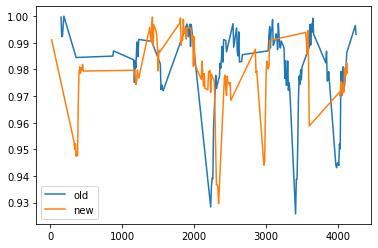

In [2]:
params = pd.read_csv('./data/parameters.csv', delimiter=',', header=None)
print(params)
fname = './data/lcvold001.dat'
x1 = pd.read_csv(fname, delimiter=',', header=None)
# print(x1)
t = x1[0]
x = x1[1]
plt.plot(t,x, label = 'old')
fname = './data/lcvnew001.dat'
x2 = pd.read_csv(fname, delimiter=',', header=None)
t = x2[0]
x = x2[1]
plt.plot(t,x, label = 'new')
#Add a legend
plt.legend()
# Show the plot
plt.show()

In [26]:
import datetime
df = pd.DataFrame()
d = []
for x in x1[0]:
    d.append(datetime.datetime.fromtimestamp(x*60))
date = pd.DataFrame(d)
print(date)
df['ds']=date[0]
df['y']=x1[1]
m = Prophet(changepoint_prior_scale=0.0001)
df

                      0
0   1970-01-01 02:30:00
1   1970-01-01 02:40:00
2   1970-01-01 02:50:00
3   1970-01-01 03:00:00
4   1970-01-01 03:10:00
..                  ...
121 1970-01-03 20:20:00
122 1970-01-03 20:30:00
123 1970-01-03 20:40:00
124 1970-01-03 22:40:00
125 1970-01-03 22:50:00

[126 rows x 1 columns]


,ds,y
0,1970-01-01 02:30:00,0.999673
1,1970-01-01 02:40:00,0.992358
2,1970-01-01 02:50:00,0.992604
3,1970-01-01 03:00:00,0.996445
4,1970-01-01 03:10:00,1.000000
...,...,...
121,1970-01-03 20:20:00,0.977153
122,1970-01-03 20:30:00,0.979494
123,1970-01-03 20:40:00,0.986137
124,1970-01-03 22:40:00,0.996541


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


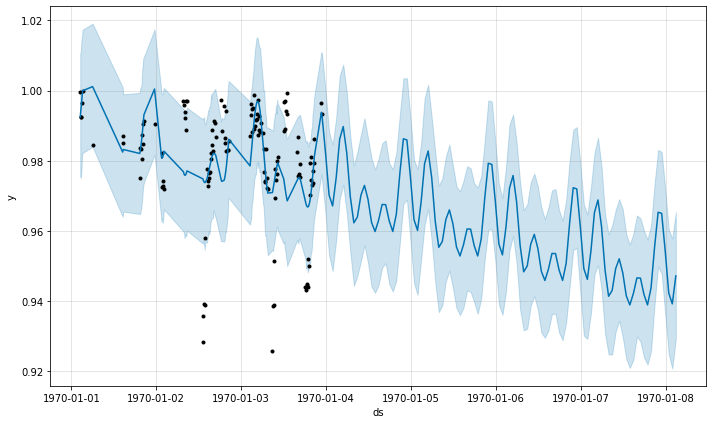

In [27]:
m.fit(df)
future = m.make_future_dataframe(periods=100, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

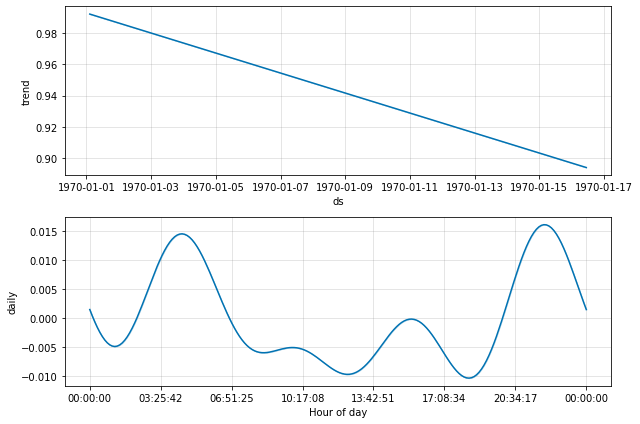

In [20]:
fig = m.plot_components(fcst)
